# Linear Regression

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Dhaka Rent.csv")
df.head(2)

,area;rent
0,2000;31500
1,2100;35000


In [3]:
df.shape

(60, 1)

In [4]:
df = pd.read_csv("Dhaka Rent.csv", sep=';')
df.head(2)

,area,rent
0,2000,31500
1,2100,35000


In [5]:
df.shape

(60, 2)

In [6]:
x = df['area']
y = df['rent']

In [7]:
mean_x = np.mean(x)
mean_y = np.mean(y)

In [8]:
dev_x = x - mean_x
dev_y = y - mean_y

In [9]:
m = np.sum(dev_x * dev_y) / np.sum(dev_x ** 2)
print(m)

21.292661473611954


In [10]:
c = mean_y - (m * mean_x)
c

np.float64(-11469.7354464311)

In [11]:
pred_2000 = m*2000+c
pred_2000

np.float64(31115.58750079281)

In [12]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [13]:
pred_3000 = m*3000+c
pred_3000

np.float64(52408.24897440476)

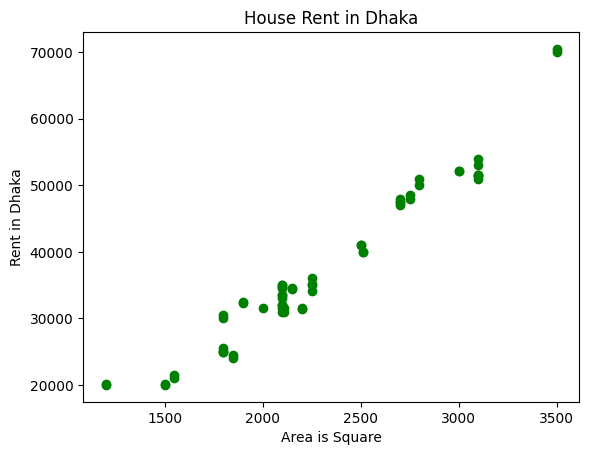

In [14]:
plt.scatter(x,y, color = 'green')
plt.xlabel('Area is Square')
plt.ylabel('Rent in Dhaka')
plt.title('House Rent in Dhaka')

plt.show()

In [15]:
df.corr()

,area,rent
area,1.000000,0.974807
rent,0.974807,1.000000


In [16]:
df.describe()

,area,rent
count,60.000000,60.000000
mean,2289.000000,37269.166667
std,538.880509,11770.736234
min,1200.000000,20000.000000
25%,1900.000000,31000.000000
50%,2130.000000,34450.000000
75%,2700.000000,47625.000000
max,3500.000000,70500.000000


# sklearn LinearRegression

In [17]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [18]:
reg.fit(df[['area']], df['rent'])

LinearRegression()

In [19]:
reg.coef_

array([21.29266147])

In [20]:
print(c,m)

-11469.7354464311 21.292661473611954


In [21]:
reg.intercept_

np.float64(-11469.735446431114)

In [22]:
reg.predict([[2000]])

array([31115.58750079])

In [23]:
df['predict'] = reg.predict(df[['area']])
df.head()

,area,rent,predict
0,2000,31500,31115.587501
1,2100,35000,33244.853648
2,2500,41050,41761.918238
3,2250,36100,36438.752869
4,3000,52100,52408.248974


In [24]:
df['residuals'] = df['rent'] - df['predict']
df.head()

,area,rent,predict,residuals
0,2000,31500,31115.587501,384.412499
1,2100,35000,33244.853648,1755.146352
2,2500,41050,41761.918238,-711.918238
3,2250,36100,36438.752869,-338.752869
4,3000,52100,52408.248974,-308.248974


# MSE, MAE, RMSE

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [26]:
MSE = mean_squared_error(df[['predict']], df[['rent']])
MSE

6778077.204095561

In [27]:
MAE = mean_absolute_error(df.predict, df.rent)
MAE

2009.8695093576282

# Visualize

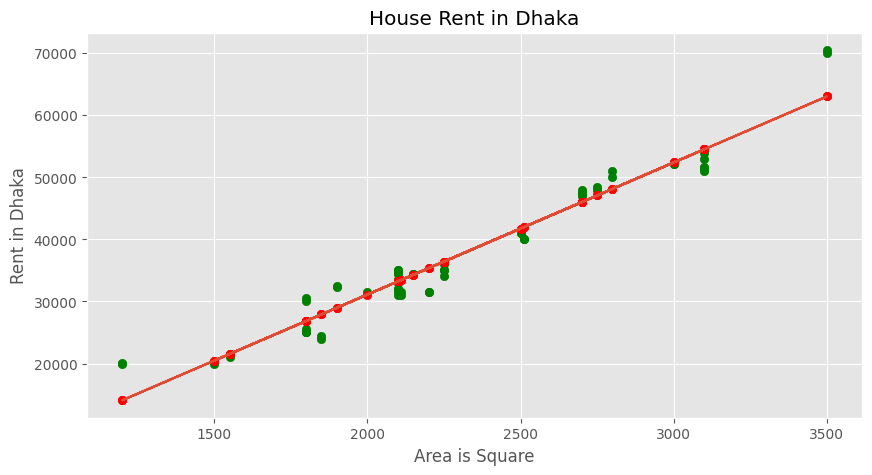

In [28]:
plt.figure(figsize=(10, 5))
plt.style.use('ggplot')

plt.scatter(x, y, color = 'green')
plt.plot(x, df.predict)
plt.scatter(x, df.predict, color = 'red')

plt.xlabel('Area is Square')
plt.ylabel('Rent in Dhaka')
plt.title('House Rent in Dhaka')

plt.savefig('House Rent.png')
plt.show()